In [61]:
import pandas as pd
import glob
from os.path import basename, splitext
import ipywidgets as widgets
import seaborn as sns
names = [splitext(basename(x))[0] for x in glob.iglob("../data/pre_evaluation/*.csv")]
sns.set()
sns.set_style("darkgrid")
dfs = {name: pd.read_csv(f"../data/pre_evaluation/{name}.csv") for name in names }
plette = sns.color_palette("bright", n_colors=17)
sns.set_palette(plette)

In [62]:
%matplotlib inline

import matplotlib.pyplot as plt

cols = [
    'no_of_clusters', 'no_of_outliers', 'mean_cluster_size',
    'standard_deviation_cluster_size', 'variance_cluster_size', 'max_cluster_size',
    'gini', 'token_entropy','position_entropy',
    'avg_token_entropy','avg_position_entropy'

]
#df['neighbour_size'] = df['neighbour_size'].astype(str)
def plot2x2(name, response):
    _df = dfs[name]
    #_df['_type'] = _df['types'].str[:-2]
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
    
    for i, (name, subdf) in enumerate(_df.groupby(['cleaned', 'weighted'])): 
        _ax = ax=axes[int(i/2),i%2]
        for name2, subdf2 in subdf.groupby(['neighbour_size']): 
            subdf2.plot(x = 'eps', y=response, ax=_ax, label=str(name2), title=f'{name[0]}, {name[1]}')
    return fig

#widgets.interact(plot2x2, name=names, response=cols)

In [101]:
def plot4x3(name):
    global _df
    _df = dfs[name].copy()
    _df['types'] = _df['types'].replace('clean_notweighted_10', 'Context length 10')
    _df['types'] = _df['types'].replace('clean_notweighted_4', 'Context length 4')
    
    if 'cleaned' in _df.columns and 'weighted' in _df.columns:
        subdf = _df[(_df.cleaned=='clean') & (_df.weighted=='weighted')]
    else:
        subdf = _df

    cols = [
        'no_of_clusters', 'no_of_outliers', 'mean_cluster_size',
        'standard_deviation_cluster_size', 'variance_cluster_size', 'max_cluster_size',
        'gini', 'token_entropy','position_entropy',
        'avg_token_entropy','avg_position_entropy'
        
    ]

    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,16))
    for i, column in enumerate(cols):
        if column in subdf.columns:
            _ax = axes[int(i/3),i%3]
            _ax.xaxis.label.set_visible(False)
            if column in ('gini'):
                _ax.yaxis.axes.set_ylim(0,1)
            # if column in ('max_cluster_size', 'variance_cluster_size'):
            #     _ax.yaxis.axes.set_ylim(0,500)
            # elif 'cluster_size' in column and 'skewness' not in column:
            #     _ax.yaxis.axes.set_ylim(0,120)

            for name2, subdf2 in subdf.groupby(['types']): 

                subdf2.plot(x = 'eps', y=column, ax=_ax, label=str(name2), title=column.replace('_',' ').title(), xticks=[.5,1,1.5,2,2.5,3,3.5,4], )

widgets.interact(plot4x3, name=names)

interactive(children=(Dropdown(description='name', options=('E_(mathematical_constant)', 'Berlin_Wall', 'Truth…

<function __main__.plot4x3(name)>

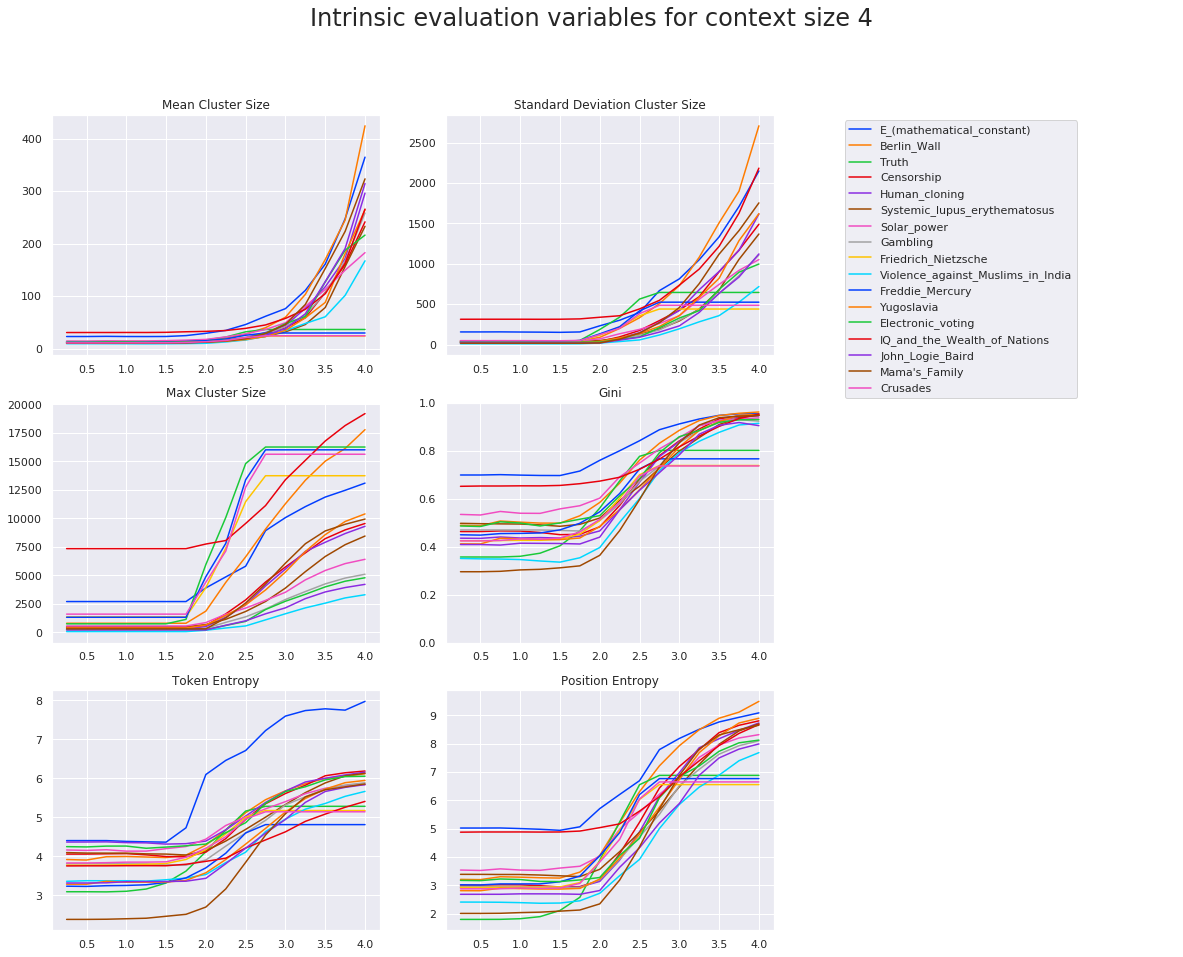

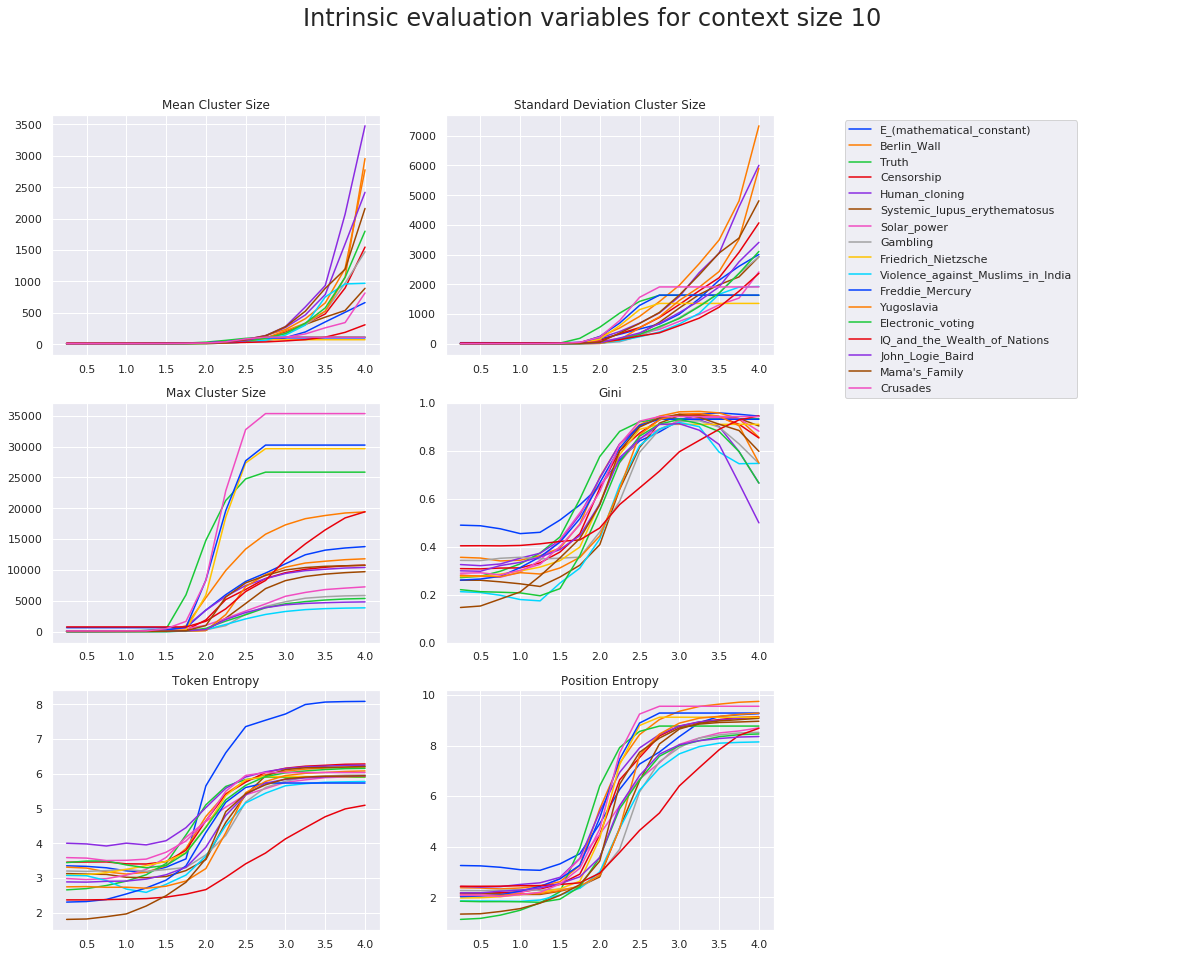

In [127]:
def splot2x3(_type):
    global _plot, fig, axes, _ax
    cols = [
        'mean_cluster_size', 'standard_deviation_cluster_size', 'max_cluster_size',
        'gini', 'token_entropy','position_entropy',        
    ]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
    fig.suptitle(f'Intrinsic evaluation variables for context size {_type.split("_")[-1]}', fontsize=24)
    for i, column in enumerate(cols):
        for article, subdf in dfs.items():
#         for article in      ["Human_cloning" ,"Systemic_lupus_erythematosus","Solar_power",
#                   "Gambling","Electronic_voting","John_Logie_Baird",
#                     "Violence_against_Muslims_in_India"]:
#         for article in      [ "Crusades","Friedrich_Nietzsche", "Freddie_Mercury", 
#                  "Truth", "IQ_and_the_Wealth_of_Nations","Berlin_Wall", "E_(mathematical_constant)", "Yugoslavia", "Censorship", 
#                                "Mama's_Family","Human_cloning",  "Systemic_lupus_erythematosus","Solar_power",
#                   "Gambling","Electronic_voting","John_Logie_Baird",
#                     "Violence_against_Muslims_in_India" ]:
       
#          for article in      [ "Systemic_lupus_erythematosus","Solar_power",
#                   "Gambling","Electronic_voting","John_Logie_Baird",
#                     "Violence_against_Muslims_in_India"]:
                 
#         for article in  ["Crusades","Friedrich_Nietzsche", "Freddie_Mercury", 
#                  "Truth", "IQ_and_the_Wealth_of_Nations",]:

            subdf = dfs[article]
            subdf=subdf[subdf['types']==_type]
            if column in subdf.columns:
                _ax = axes[int(i/2),i%2]
                _ax.xaxis.label.set_visible(False)
                if column in ('gini'):
                    _ax.yaxis.axes.set_ylim(0,1)
                # if column in ('max_cluster_size', 'variance_cluster_size'):
                #     _ax.yaxis.axes.set_ylim(0,500)
                # elif 'cluster_size' in column and 'skewness' not in column:
                #     _ax.yaxis.axes.set_ylim(0,120)

                _plot = subdf.plot(x='eps', y=column, ax=_ax, label=str(article), title=column.replace('_',' ').title(), xticks=[.5,1,1.5,2,2.5,3,3.5,4], legend=False)
#                 _ax.set_xlabel("eps")
    handles, labels = _ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='lower right')
    axes[0,2].legend(handles, labels, loc='upper left')
    axes[0,2].axis('off')
    axes[1,2].axis('off')


    axes[2,2].axis('off')
    return fig
    
# widgets.interact(splot2x3, _type=['clean_notweighted_10','clean_notweighted_4'])
fi_4 = splot2x3(_type="clean_notweighted_4")
fi_4.savefig("visualisation/clean_notweighted_4",dpi=600)
fi_10 = splot2x3(_type="clean_notweighted_10")
fi_10.savefig("visualisation/clean_notweighted_10", dpi=600)

                 


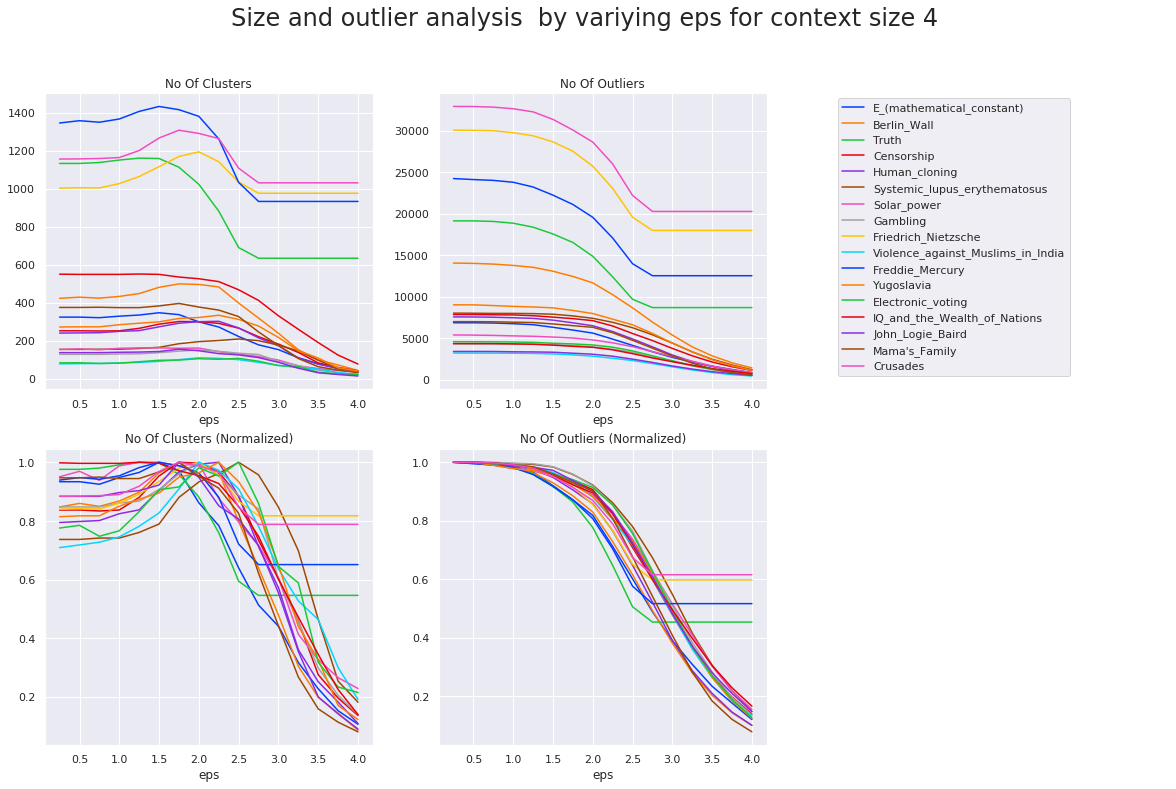

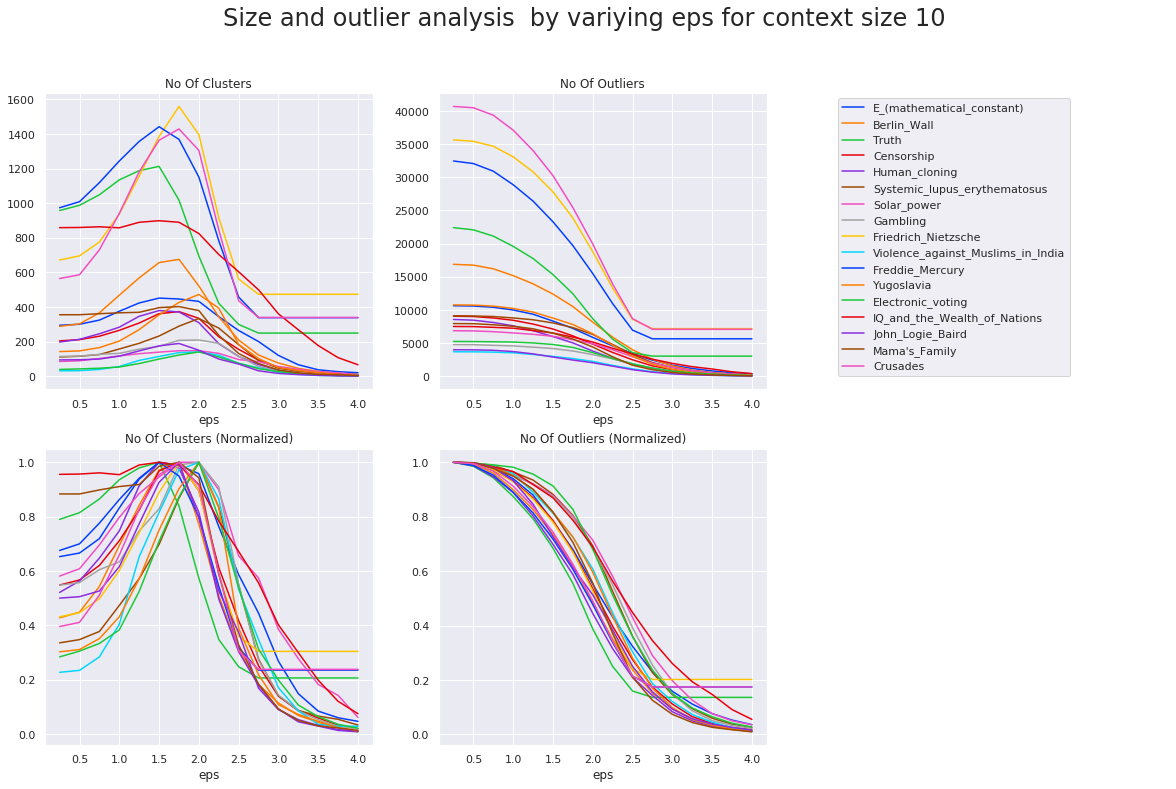

In [128]:
def splot2x3(_type):
    global _plot, fig, axes, _ax, subdf
    cols = [
        'no_of_clusters', 'no_of_outliers'
    ]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
    fig.suptitle(f'Size and outlier analysis  by variying eps for context size {_type.split("_")[-1]}', 
                 fontsize=24)


    for i, column in enumerate(cols):
        for article, subdf in dfs.items():
            subdf=subdf[subdf['types']==_type].copy()
            if column in subdf.columns:
                _ax = axes[int(i/3),i%3]
#                 _ax.xaxis.label.set_visible(False)
                _plot = subdf.plot(x = 'eps', y=column, ax=_ax, label=str(article), title=column.replace('_',' ').title(), xticks=[.5,1,1.5,2,2.5,3,3.5,4], legend=False)
               
                _ax = axes[int(i/3)+1,i%3]
#                 _ax.xaxis.label.set_visible(False)
                subdf[column] = subdf[column] / subdf[column].max()
                _plot = subdf.plot(x = 'eps', y=column, ax=_ax, label=str(article), title=column.replace('_',' ').title() + " (Normalized)", xticks=[.5,1,1.5,2,2.5,3,3.5,4], legend=False)
                _ax.set_xlabel("eps")


    handles, labels = _ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='lower right')
    axes[0,2].legend(handles, labels, loc='upper left')
    axes[0,2].axis('off')
    axes[1,2].axis('off')
    
    return fig
    
# widgets.interact(splot2x3, _type=['clean_notweighted_10','clean_notweighted_4'])
fi_4 = splot2x3(_type="clean_notweighted_4")
fi_4.savefig("visualisation/4_size",dpi=600)
fi_10 = splot2x3(_type="clean_notweighted_10")
fi_10.savefig("visualisation/10_size", dpi=600)




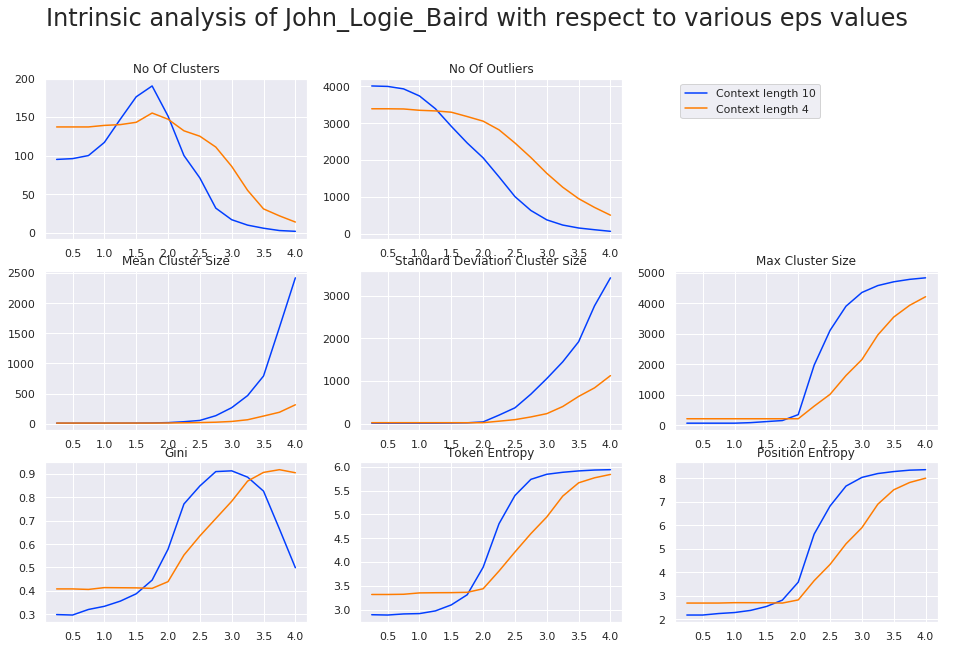

In [129]:

def plot3x3(name):
    global _df
    _df = dfs[name].copy()
    
    _df['types'] = _df['types'].replace('clean_notweighted_10', 'Context length 10')
    _df['types'] = _df['types'].replace('clean_notweighted_4', 'Context length 4')
    
    if 'cleaned' in _df.columns and 'weighted' in _df.columns:
        subdf = _df[(_df.cleaned=='clean') & (_df.weighted=='weighted')]
    else:
        subdf = _df
        
    cols = [
        'no_of_clusters', 'no_of_outliers', 'LEGEND',
        'mean_cluster_size', 'standard_deviation_cluster_size', 'max_cluster_size',
        'gini', 'token_entropy','position_entropy',        
    ]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10))
    fig.suptitle(f'Intrinsic analysis of John_Logie_Baird with respect to various eps values', fontsize=24)


    
#     fig.tight_layout()
    for i, column in enumerate(cols):
        
        if column not in subdf.columns:
            
            handles, labels = _ax.get_legend_handles_labels()
            #fig.legend(handles, labels, loc='lower right')
            _ax = axes[int(i/3),i%3]
            _ax.legend(handles, labels, loc='upper left')
            _ax.axis('off')

        else:
            _ax = axes[int(i/3),i%3]
            
            _ax.xaxis.label.set_visible(False)
            #_ax.yaxis.axes.set_ylim(0,1)
            # if column in ('max_cluster_size', 'variance_cluster_size'):
            #     _ax.yaxis.axes.set_ylim(0,500)
            # elif 'cluster_size' in column and 'skewness' not in column:
            #     _ax.yaxis.axes.set_ylim(0,120)

            for name2, subdf2 in subdf.groupby(['types']): 
                subdf2.plot(x = 'eps', y=column, ax=_ax, label=str(name2), title=column.replace('_',' ').title(), xticks=[.5,1,1.5,2,2.5,3,3.5,4], legend=False)
    return fig

#widgets.interact(plot3x3, name=names)

jlb_fig = plot3x3('John_Logie_Baird')
jlb_fig.savefig("visualisation/jlb", dpi=600)